<a href="https://colab.research.google.com/github/Deeyadav2001/World_GDP/blob/main/gdp_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Importing all requirements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

##### Loading dataset from the system

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_csv("/content/drive/MyDrive/ass1_sol/gdpWorld.csv")
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


##### replacing the string ',' with '.' as the float data cannot be separated by commas

In [4]:
data.replace(',','.',regex=True,inplace=True)


##### checking data-types of the given data set

In [5]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [6]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

##### setting Data-types as float64 using ({'cols':'float64'})

In [7]:
data= data.astype({ 'Net migration': 'float64', 'Infant mortality (per 1000 births)': 'float64', 'Literacy (%)': 'float64',
                   'Phones (per 1000)': 'float64', 'Arable (%)': 'float64', 'Crops (%)': 'float64', 'Other (%)': 'float64',
                   'Birthrate': 'float64', 'Deathrate': 'float64', 'Agriculture': 'float64', 
                    'Industry': 'float64', 'Service': 'float64','Pop. Density (per sq. mi.)':'float64','Coastline (coast/area ratio)':'float64'})

In [8]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

##### checking for Missing values in the % formate

In [9]:
data.isnull().sum()/len(data)*100

Country                               0.000000
Region                                0.000000
Population                            0.000000
Area (sq. mi.)                        0.000000
Pop. Density (per sq. mi.)            0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

##### filling the missing values or null values using mean and mode function

In [10]:
data['Literacy (%)'].fillna(data['Literacy (%)'].mean(),inplace=True)
data['GDP ($ per capita)'].fillna(data['GDP ($ per capita)'].mean(),inplace=True)
data['Agriculture'].fillna(data['Agriculture'].mean(),inplace=True)
data['Industry'].fillna(data['Industry'].mean(),inplace=True)
data['Service'].fillna(data['Service'].mean(),inplace=True)
data['Birthrate'].fillna(data['Birthrate'].mean(),inplace=True)
data['Deathrate'].fillna(data['Deathrate'].mean(),inplace=True)
data['Phones (per 1000)'].fillna(data['Phones (per 1000)'].mean(),inplace=True)
data['Arable (%)'].fillna(data['Arable (%)'].mean(),inplace=True)
data['Crops (%)'].fillna(data['Crops (%)'].mean(),inplace=True)
data['Other (%)'].fillna(data['Other (%)'].mean(),inplace=True)
data['Climate'].fillna(data['Climate'].mode,inplace=True)
data['Pop. Density (per sq. mi.)'].fillna(data['Pop. Density (per sq. mi.)'].mean(),inplace=True)
data['Coastline (coast/area ratio)'].fillna(data['Coastline (coast/area ratio)'].mean(),inplace=True)
data['Net migration'].fillna(data['Net migration'].mean(),inplace=True)
data['Infant mortality (per 1000 births)'].fillna(data['Infant mortality (per 1000 births)'].mean(),inplace=True)

In [11]:
data.isnull().sum()/len(data)*100

Country                               0.0
Region                                0.0
Population                            0.0
Area (sq. mi.)                        0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

##### drop the column of GDP to last columns to get the output

In [12]:
data1=pd.DataFrame(data)
first_column=data.pop('GDP ($ per capita)')
data.insert(19,'GDP ($ per capita)',first_column)


In [13]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380000,0.240000,0.380000,700.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232000,0.188000,0.579000,4500.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101000,0.600000,0.298000,6000.0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,0.150844,0.282711,0.565283,8000.0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.150844,0.282711,0.565283,19000.0


##### Before Prediction Lates Check for coorelation befween the columns

<ipython-input-14-ca21193ca0fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax,cmap='coolwarm').set(


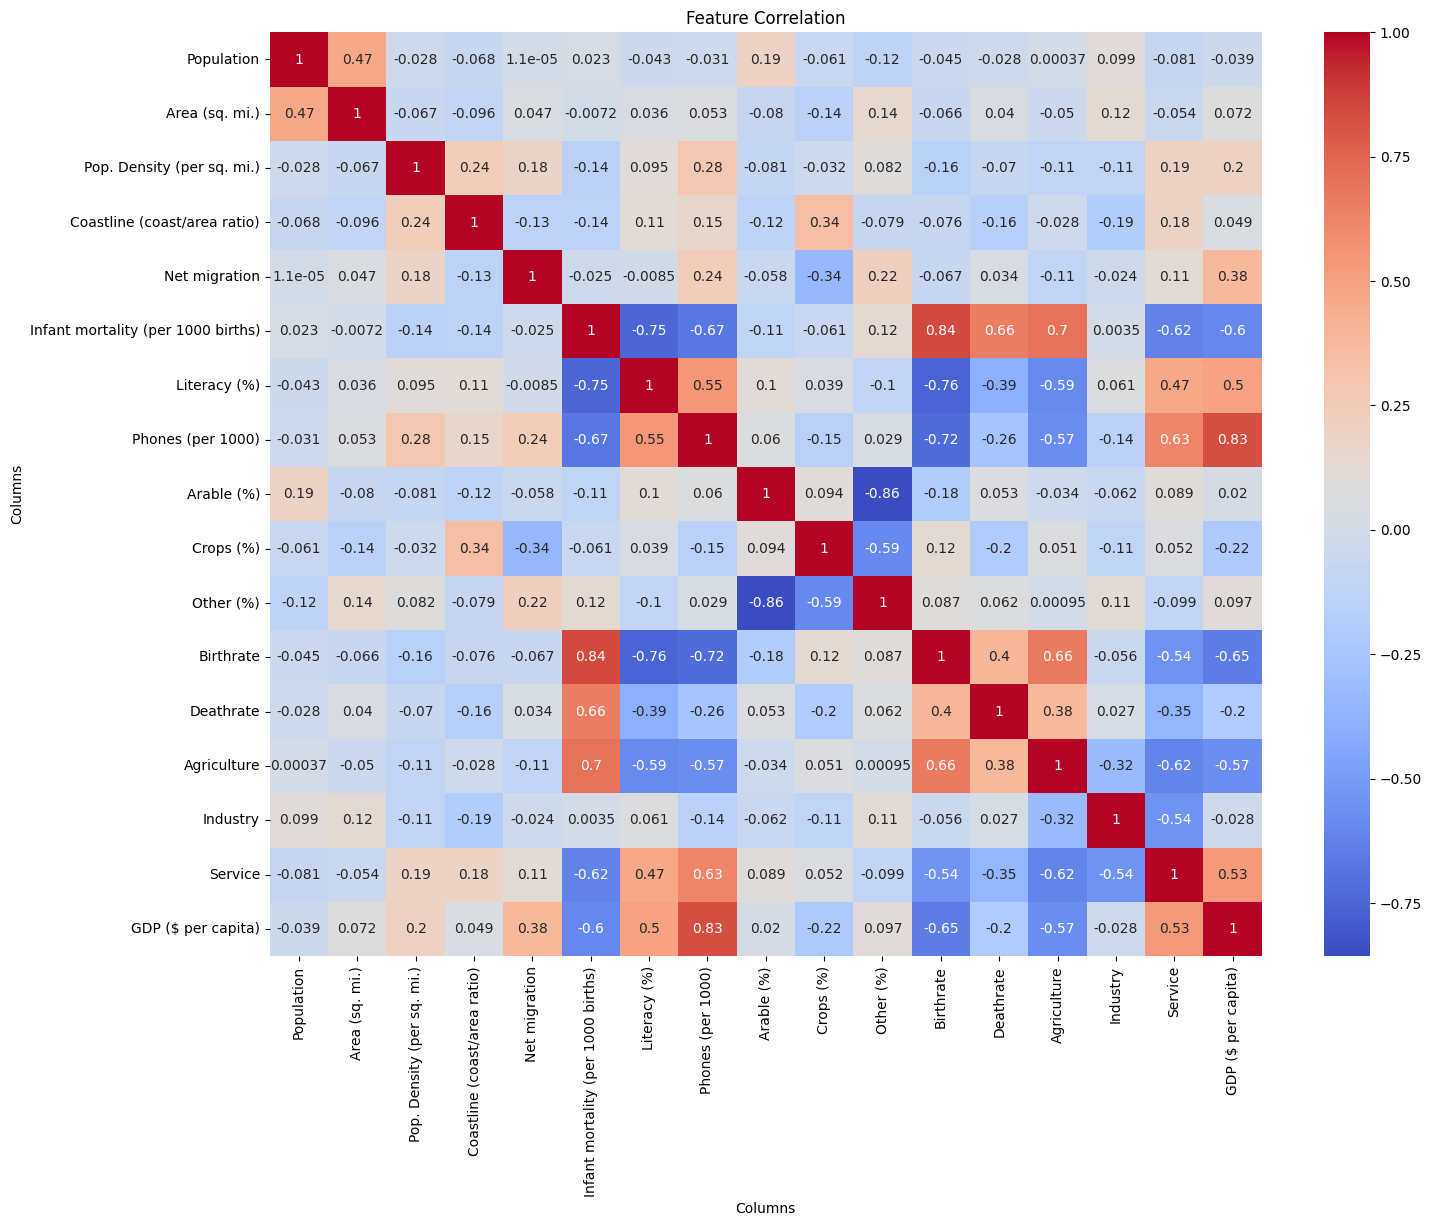

In [14]:
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(data.corr(), annot=True, ax=ax,cmap='coolwarm').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

##### now for prediction as per above understanding, lets split the dataset into train  & test

In [15]:
train, test = train_test_split(data, test_size=0.2)
training_features = [
    'Phones (per 1000)','Net migration','Service',
    'Industry','Crops (%)','Infant mortality (per 1000 births)'
       ]
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [16]:
len(test_X)

46

##### prection based on linear regression model

In [17]:
model = LinearRegression()
#fitting L R model 
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)
score=model.predict(test_X)

rmse_train1 = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train1 = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test1 = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test1 = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train1:',rmse_train1,'msle_train1:',msle_train1)
print('rmse_test1:',rmse_test1,'msle_test1:',msle_test1)
print('R2_Score: ', r2_score(test_Y,score)*100)

rmse_train1: 4777.282525899002 msle_train1: 5.5049680945145605
rmse_test1: 5776.727846264845 msle_test1: 1.6102797841558418
R2_Score:  69.86473788377003


#####  using elasticnet linear regression with L1 and L2 regressor

In [18]:
ELS=ElasticNet(random_state=70)
ELS.fit(train_X,train_Y)

ElasticNet(random_state=70)

In [19]:
train_pred = ELS.predict(train_X)
test_pred = ELS.predict(test_X)
rmse_trainh = mean_squared_error(train_pred,train_Y,squared=False)
rmse_testh = mean_squared_error(test_pred, test_Y,squared=False)
score1=model.predict(test_X)

print("RMSE_train : ",rmse_trainh)
print("RMSE_test : ",rmse_testh)
print('R2_Score: ', r2_score(test_Y,score1)*100)

RMSE_train :  4906.6860956666005
RMSE_test :  5909.586056000639
R2_Score:  69.86473788377003


##### Using RandomForest Regression

In [20]:
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)
score2=model.predict(test_X)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
print('R2_Score: ', r2_score(test_Y,score2)*100)


rmse_train: 3300.2053296638583 msle_train: 0.2024921365156075
rmse_test: 5721.444460947472 msle_test: 0.4111576710875829
R2_Score:  70.68801124299539


##### hyper parameter optimization Random Forest

In [21]:
op_model = RandomForestRegressor()
params = {'n_estimators':[x for x in range(1,100)], 'max_depth':[x for x in range(3,15)]}
grid_model = GridSearchCV(op_model, param_grid=params, verbose=2)
grid_model.fit(train_X,train_Y)

Streaming output truncated to the last 5000 lines.
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=90; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=91; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=91; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=91; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=91; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=91; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [22]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=5)

In [23]:
op_model = RandomForestRegressor(max_depth=15, n_estimators=10)
op_model.fit(train_X,train_Y)
train_pred = op_model.predict(train_X)
test_pred = op_model.predict(test_X)
rmse_trainrh = mean_squared_error(train_pred, train_Y,squared=False)
rmse_testrh = mean_squared_error(test_pred, test_Y,squared=False)
score3=op_model.predict(test_X)

print("RMSE_train : ",rmse_trainrh)
print("RMSE_test : ",rmse_testrh)
print('R2_Score: ', r2_score(test_Y,score3)*100)


RMSE_train :  1768.4982763148055
RMSE_test :  6342.539324446778
R2_Score:  63.97862807564467


##### the below plots are based of root mean square errors and mean squared log error

Text(0, 0.5, 'Root mean squared error')

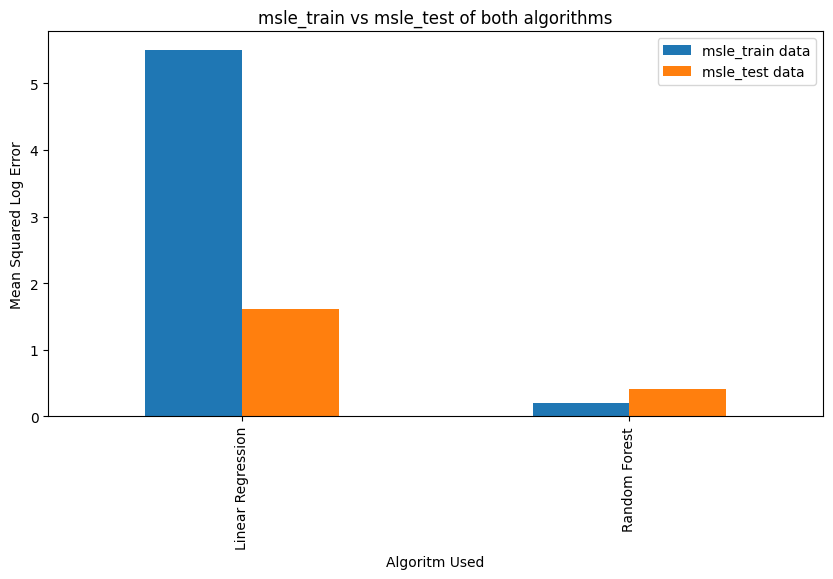

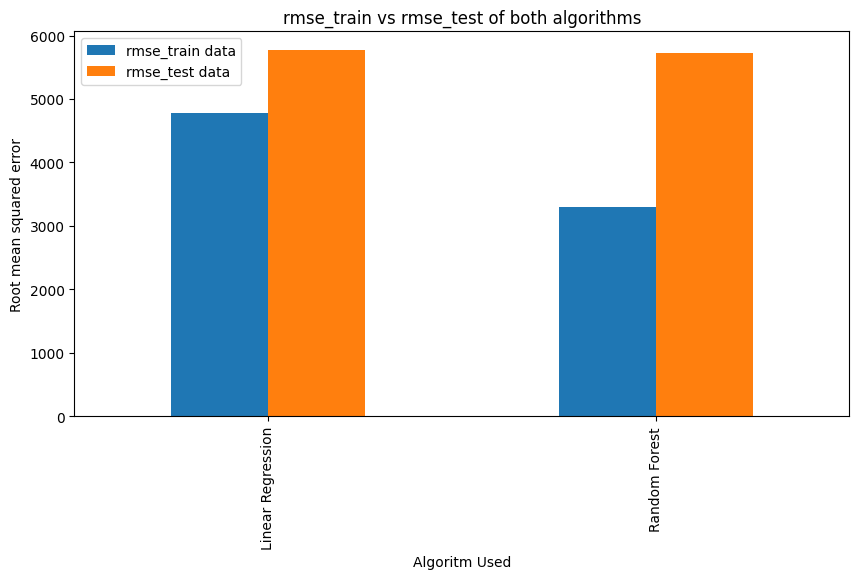

In [24]:
plotdata = pd.DataFrame({

    "msle_train data":[msle_train1,msle_train],

    "msle_test data":[msle_test1,msle_test]},

    index=[ "Linear Regression","Random Forest"])


plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("msle_train vs msle_test of both algorithms")

plt.xlabel("Algoritm Used")

plt.ylabel("Mean Squared Log Error")

plotdata = pd.DataFrame({

    "rmse_train data":[rmse_train1,rmse_train],

    "rmse_test data":[rmse_test1,rmse_test]},

    index=[ "Linear Regression","Random Forest"])


plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("rmse_train vs rmse_test of both algorithms")

plt.xlabel("Algoritm Used")

plt.ylabel("Root mean squared error")

<ipython-input-25-6879bacfa349>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
<ipython-input-25-6879bacfa349>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)


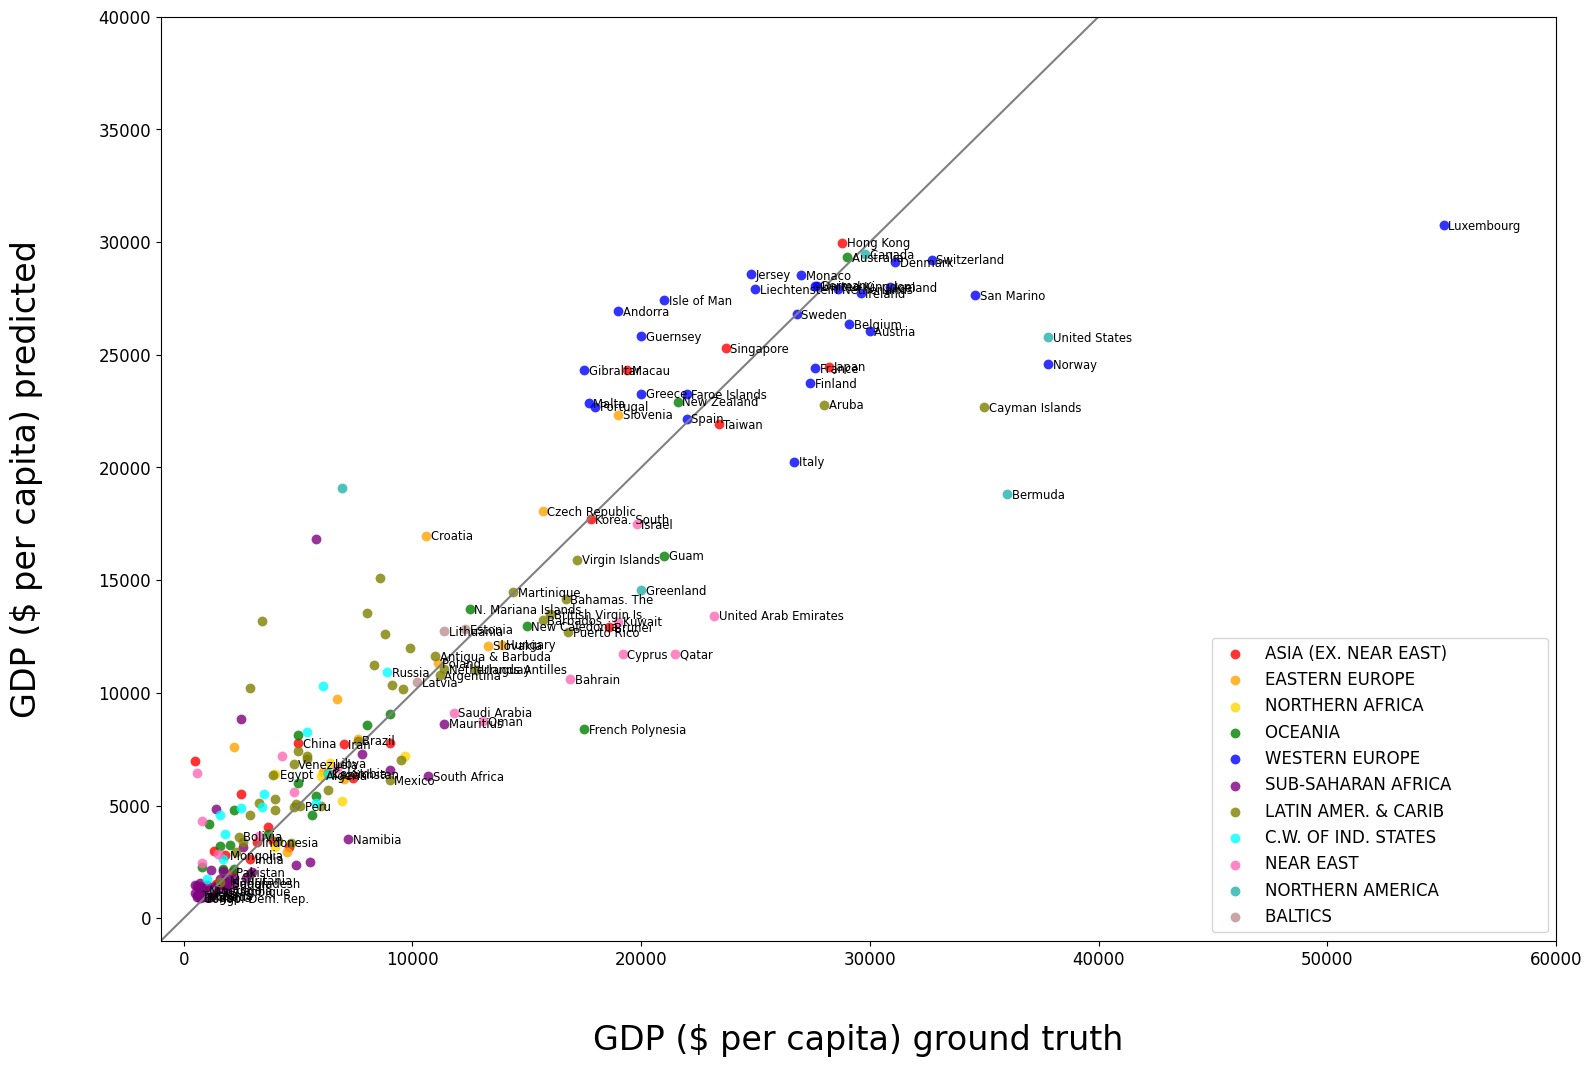

In [25]:
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('GDP ($ per capita) ground truth',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

<Axes: xlabel='Infant mortality (per 1000 births)', ylabel='GDP ($ per capita)'>

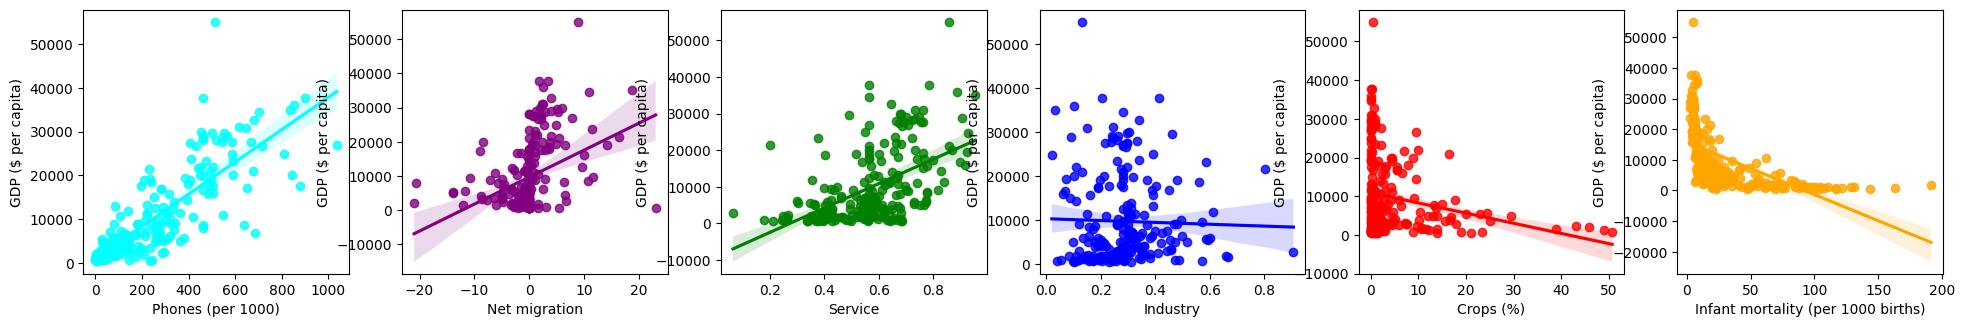

In [26]:
plt.figure(figsize=(24,24))
plt.subplot(6,6,1)
sns.regplot(x='Phones (per 1000)',y='GDP ($ per capita)',data=data,color='cyan')

plt.subplot(6,6,2)
sns.regplot(x='Net migration',y='GDP ($ per capita)',data=data,color='purple')

plt.subplot(6,6,3)
sns.regplot(x='Service',y='GDP ($ per capita)',data=data,color='green')

plt.subplot(6,6,4)
sns.regplot(x='Industry',y='GDP ($ per capita)',data=data,color='blue')

plt.subplot(6,6,5)
sns.regplot(x='Crops (%)',y='GDP ($ per capita)',data=data,color='red')

plt.subplot(6,6,6)
sns.regplot(x=data['Infant mortality (per 1000 births)'],y='GDP ($ per capita)',data=data,color='orange')